# Analisi CMR
#### Claudia Gabriela Ochoa Martinez (2020)

In [46]:
library(dplyr)
library(DT)
library(data.table)
library(gt)
library(tidyverse)
library(glue)
library(imager)
library(tidyr)

Daticatt <- read.csv("Dati-elaborati\\Dati-catture.csv", dec=",", sep=";", header = TRUE)

In [2]:
head(Daticatt)

,ID_cattura,ALBA,sessione,occasione,ID_TRAPPOLA,chip,ricattura,pelo,peso..g.,sex,eta,statoripr,NOTE,DOY,Data_R,Anno
,<int>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<int>
1,1,T,1,1,11,1315302,N,NA,36,F,A,NR,NA,243,2014-08-31,2014
2,2,A,1,2,6,NA,N,SI,35,F,A,NR,NA,244,2014-09-01,2014
3,3,A,1,2,11,NA,N,SI e,41,M,A,R,NA,244,2014-09-01,2014
4,4,A,1,2,35,1314921,N,NA,39,F,A,NA,NA,244,2014-09-01,2014
5,5,A,1,2,45,1314375,N,NA,33,M,G,NR,NA,244,2014-09-01,2014
6,6,T,1,3,26,1314305,N,NA,45,M,A,R,NA,244,2014-09-01,2014


#### Creiamo un nuovo data frame per verificare, sesso ed età degli individui catturati ogni anno

In [3]:
analisi_sex_age <- subset(Daticatt,select= c(sessione,Anno,sex,eta))

#### Visualizziamo il numero di catture per ciascun anno

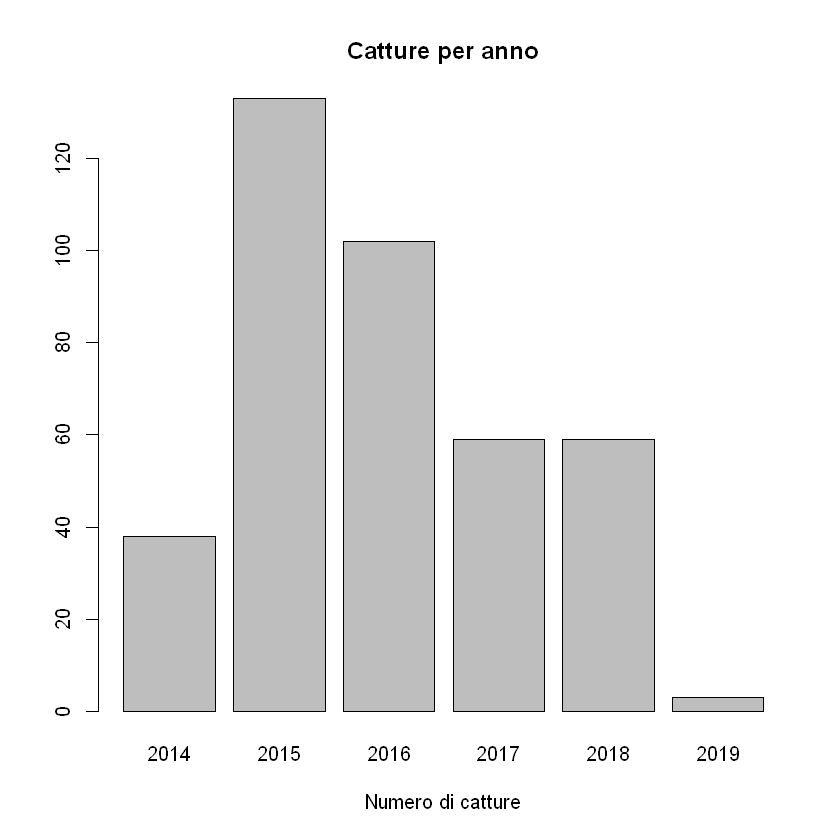

In [4]:
n_catt_anno <- table(analisi_sex_age$Anno) 
barplot(n_catt_anno, main="Catture per anno",xlab="Numero di catture") 

#### E'possible anche verificare per ciascun anno, quanti individui per ogni sesso ed età sono stati catturati, cambiando semplicemente l'anno nel codice seguente

In [5]:
#analisi_sex_age_$sex <-  as.character(analisi_sex_age$sex)
#analisi_sex_age_$eta <-  as.character(analisi_sex_age$eta)

analisi_sex_age_ <- analisi_sex_age %>%
  rename(Sesso = sex, Eta = eta) %>%
  mutate(Sesso = sub("F", "Femmina", Sesso)) %>%
  mutate(Sesso = sub("M", "Maschio", Sesso)) %>%
  mutate(Eta = sub("A", "Adulto", Eta)) %>%
  mutate(Eta = sub("G", "Giovane", Eta)) 

In [64]:
subject_year = "2018"
subject_session = "2"
analisi_sex_age_tbl <- analisi_sex_age_ %>%
  filter(Anno == subject_year, sessione == subject_session) %>%
  count(sessione, Sesso, Eta) %>%
  group_by(Sesso, Eta) %>% 
  summarise(Totale = sum(n))
analisi_sex_age_tbl

`summarise()` regrouping output by 'Sesso' (override with `.groups` argument)



Sesso,Eta,Totale
<chr>,<chr>,<int>
Femmina,Adulto,12
Femmina,Giovane,6
Maschio,Adulto,4
Maschio,Giovane,6
NA,NA,2


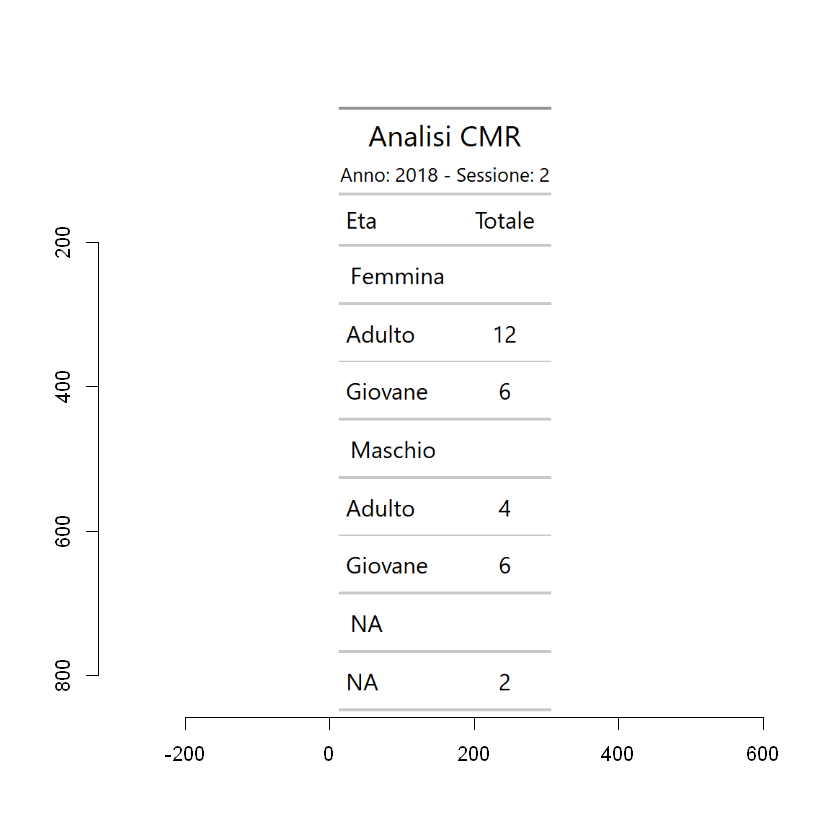

In [33]:
nome_tabella = "tab_1.png"
titolo_tabella = "Analisi CMR" 
stitolo_tabella = glue::glue("Anno: {subject_year} - Sessione: {subject_session}")

gt_tbl <- gt(data = analisi_sex_age_tbl)
gt_tbl  %>% 
  tab_header(title = titolo_tabella, subtitle = stitolo_tabella) %>%
#  tab_spanner(label = "Eta", columns = vars(Eta)) %>%
  gtsave(nome_tabella, path = "img/")

# Show the gt Table

im<-load.image(paste("img/",nome_tabella, sep = ""))
plot(im)

In [71]:
xxx <- data.frame(t(analisi_sex_age_tbl))
xxx


,X1,X2,X3,X4,X5
,<fct>,<fct>,<fct>,<fct>,<fct>
Sesso,Femmina,Femmina,Maschio,Maschio,NA
Eta,Adulto,Giovane,Adulto,Giovane,NA
Totale,12,6,4,6,2


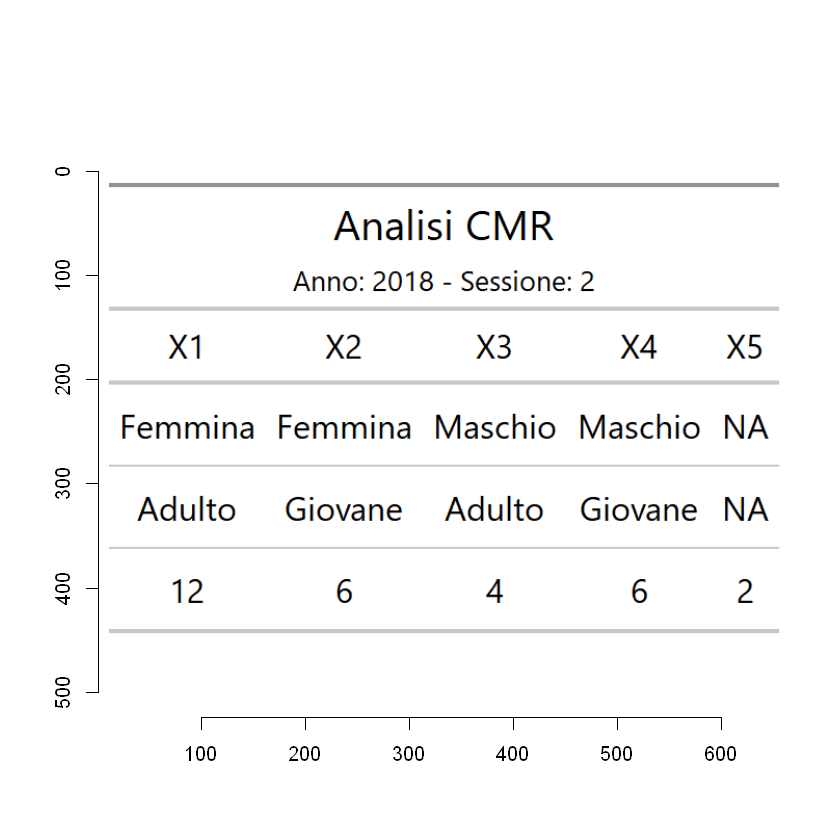

In [75]:
nome_tabella = "tab_1.png"
titolo_tabella = "Analisi CMR" 
stitolo_tabella = glue::glue("Anno: {subject_year} - Sessione: {subject_session}")

gt_tbl <- gt(data = xxx)
gt_tbl  %>% 
  tab_header(title = titolo_tabella, subtitle = stitolo_tabella) %>%
#  tab_spanner(label = "Adulto", columns = vars(X1,X3)) %>%
#  tab_spanner(label = "Giovane", columns = vars(X2,X4)) %>%
  gtsave(nome_tabella, path = "img/")

# Show the gt Table

im<-load.image(paste("img/",nome_tabella, sep = ""))
plot(im)